**Coin Toss Simulation Project**

A Monte Carlo Exploration of Bernoulli Randomness, LLN, and Sampling Distributions

**1. Introduction**

What is a Bernoulli Trial?

Definition of a fair coin:

P(H)=0.5,  P(T)=0.5

Biased coin:

P(H)=p,  P(T)=1−p

Law of Large Numbers (LLN):

Sample mean → true probability as n→∞

Goals of this project:

- Build simple and advanced coin simulations

- Explore convergence, sampling distributions, bias

- Demonstrate Monte Carlo methods

**2. Simple Simulation (Single Experiment)**

Toss a coin N times

Count number of heads and tails

Compute empirical proportion

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

np.random.seed(42)

result = np.random.choice(['H', 'T'], size=100)

print(result)

['H' 'T' 'H' 'H' 'H' 'T' 'H' 'H' 'H' 'T' 'H' 'H' 'H' 'H' 'T' 'H' 'T' 'T'
 'T' 'H' 'T' 'H' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'H' 'H' 'T' 'T' 'T' 'H'
 'T' 'H' 'H' 'H' 'H' 'H' 'T' 'T' 'T' 'T' 'T' 'H' 'T' 'T' 'H' 'T' 'H' 'T'
 'H' 'T' 'T' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'T' 'T' 'H' 'T' 'T' 'T' 'T'
 'H' 'T' 'H' 'T' 'T' 'T' 'H' 'T' 'H' 'T' 'H' 'T' 'H' 'H' 'T' 'H' 'T' 'T'
 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'T' 'H']


**3. Probability Estimation & Law of Large Numbers**

Repeat tosses for increasing N:

- 10, 50, 100, 500, 1000, 10k

Plot:

- p^(H) vs number of tosses

Show convergence toward 0.5

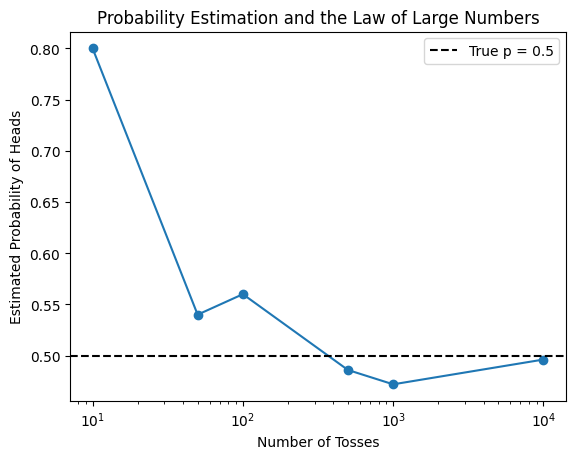

In [6]:
random.seed(42) # Reproducibility

N_values = [10, 50, 100, 500, 1000, 10000]
probabilities = []

for N in N_values:
    # simulate N fair coin flips
    tosses = [random.choice(['H', 'T']) for _ in range(N)]
    heads = tosses.count('H')
    probabilities.append(heads / N)

plt.plot(N_values, probabilities, marker='o')
plt.axhline(0.5, color='black', linestyle='--', label='True p = 0.5')
plt.xlabel('Number of Tosses')
plt.ylabel('Estimated Probability of Heads')
plt.xscale('log')
plt.legend()
plt.title('Probability Estimation and the Law of Large Numbers')
plt.show()

**4. Biased Coin Simulation**

User sets probability p

Compare:

- Fair vs biased

- Plot difference

Show how bias affects convergence

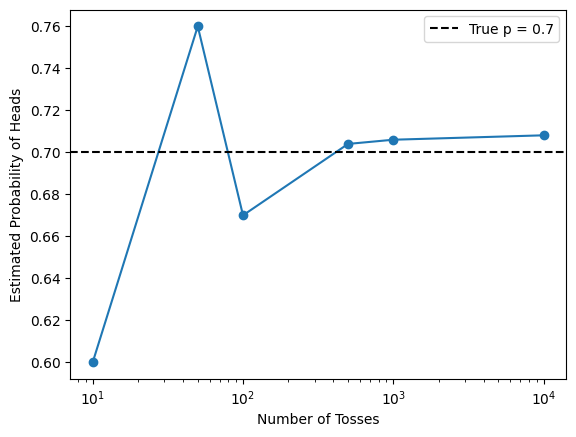

In [7]:
np.random.seed(42)

N_values = [10, 50, 100, 500, 1000, 10000]
probabilities = []

p = 0.7 # True bias of the Coin

for N in N_values:
    # vectorized simulation of N biased coin tosses
    tosses = np.random.choice(['H', 'T'], size=N, p=[p, 1-p])

    heads = np.sum(tosses == 'H')
    probabilities.append(heads / N)

# Plot
plt.plot(N_values, probabilities, marker='o')
plt.axhline(p, color='black', linestyle='--', label='True p = 0.7')
plt.xlabel('Number of Tosses')
plt.ylabel('Estimated Probability of Heads')
plt.xscale('log')
plt.legend()
plt.show()

**5. Sampling Distribution (1000 Experiments)**

Run 1000 independent experiments

Each experiment = 100 tosses

Collect mean number of heads

Plot distribution (histogram)

Compare empirical variance to theoretical variance

Theoretical: (p * (1 - p)) / n

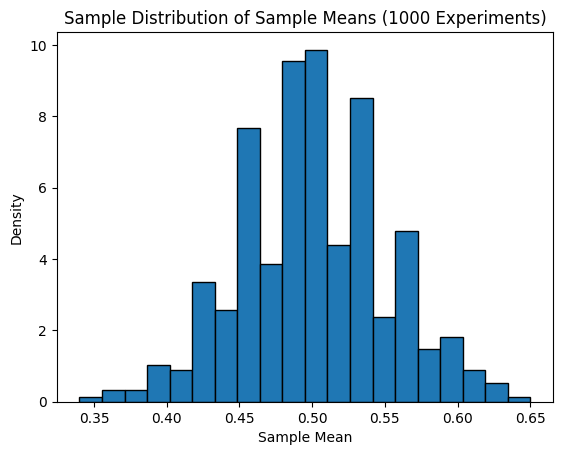

Mean of Sample Means: 0.50066
Standard Deviation: 0.05065732326130152
Theoretical SD: 0.05


In [8]:
np.random.seed(42)

# Parameters
n = 100 # sample size per experiment
p = 0.5 # true probability of heads
num_exp = 1000 # number of repeated experiments

# Run 1000 Experiments
sample_means = []
for _ in range(num_exp):
    tosses = np.random.binomial(1, p, n)
    sample_means.append(np.mean(tosses))

sample_means = np.array(sample_means)

# Plot Sampling Distribution
plt.hist(sample_means, bins = 20, edgecolor='black', density=True)
plt.title('Sample Distribution of Sample Means (1000 Experiments)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

# Print Statistics
print('Mean of Sample Means:', np.mean(sample_means))
print('Standard Deviation:', np.std(sample_means))
print('Theoretical SD:', np.sqrt(p * (1 - p) / n))

**6. Monte Carlo Methods**

6.1. Rare Events

Estimate probability of observing:

- 5 heads in a row

- 10 heads in a row

In [9]:
np.random.seed(42)

def has_streak(tosses, streak_length):
    '''Check if tosses contain a specific streak of heads.'''
    count = 0
    for t in tosses:
        if t == 1:
            count += 1
            if count >= streak_length:
                return True
        else:
            count = 0
    return False

# Parameters
num_trials = 10000
tosses_per_trial = 200

prob_5 = 0
prob_10 = 0

for _ in range(num_trials):
    tosses = np.random.binomial(1, 0.5, tosses_per_trial)
    if has_streak(tosses, 5):
        prob_5 += 1
    if has_streak(tosses, 10):
        prob_10 += 1

prob_5 /= num_trials
prob_10 /= num_trials

print('Estimated Probability of 5 Heads in a Row:', prob_5)
print('Estimated Probability of 10 Heads in a Row:', prob_10)

Estimated Probability of 5 Heads in a Row: 0.9683
Estimated Probability of 10 Heads in a Row: 0.0908


**Clarification:**

This probability refers to observing at least one run of five consecutive heads within a sequence of 200 coin tosses, not the probability of five heads occurring in a single fixed window.

6.2. Confidence Intervals

- Compute confidence intervals from Monte Carlo samples

- Compare empirical vs theoretical CI

In [11]:
np.random.seed(42)

n = 500
p = 0.5

tosses = np.random.binomial(1, p, n)
phat = np.mean(tosses)

z = 1.96 # manually chosen for 95% CI
se = np.sqrt(phat * (1 - phat) / n)

lower = phat - z * se
upper = phat + z * se

print('p̂ =', phat)
print('95% CI =', (lower, upper))

p̂ = 0.518
95% CI = (np.float64(0.4742014767006923), np.float64(0.5617985232993077))


6.3. Streak Analysis

- Probability that a streak of length L occurs

Average Longest Streak: 7.018
Max Longest Streak: 15


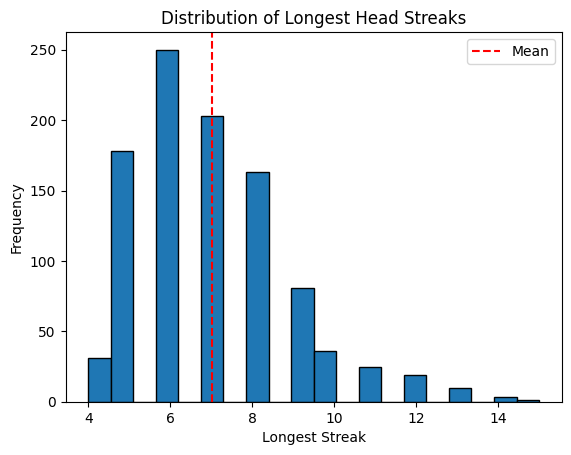

In [14]:
np.random.seed(42)

def longest_streak(tosses):
    max_streak = 0
    current = 0
    for t in tosses:
        if t == 1:
            current += 1
            max_streak = max(max_streak, current)
        else:
            current = 0
    return max_streak

# Parameters
num_trials = 1000
tosses_per_trial = 200

longest_streaks = []

# Run 1000 Experiments
for _ in range(num_trials):
    tosses = np.random.binomial(1, 0.5, tosses_per_trial)
    streak = longest_streak(tosses)
    longest_streaks.append(streak)

# Convert to Array
longest_streaks = np.array(longest_streaks)

print('Average Longest Streak:', np.mean(longest_streaks))
print('Max Longest Streak:', np.max(longest_streaks))

# Plot Distribution
plt.hist(longest_streaks, bins=20, edgecolor='Black')
plt.title('Distribution of Longest Head Streaks')
plt.xlabel('Longest Streak')
plt.ylabel('Frequency')
plt.axvline(np.mean(longest_streaks), color='Red', linestyle='--', label='Mean')
plt.legend()
plt.show()

**7. Conclusion**

- LLN demonstration

- How bias affects outcomes

- Sampling distributions

- The power of Monte Carlo

- Randomness vs convergence